<a href="https://colab.research.google.com/github/jocelynng101/Word-Embeddings-Medicial/blob/main/TravellingSalesman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import math
import time
import statistics
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from itertools import permutations

# Example Graph


United States where
0. New York
1. Los Angeles
2. Chicago
3. Minneapolis
4. Denver
5. Dallas
6. Seattle
7. Boston
8. San Francisco
9. St. Louis
10. Houston
11. Phoenix
12. Salt Lake City

In [16]:
dist_matrix = [
    [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
    [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
    [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
    [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
    [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
    [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
    [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
    [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
    [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
    [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
    [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
    [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
    [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0]
                ]

In [3]:
# Smaller Example
distances = [
    [0, 2, 2, 5, 9, 3],
    [2, 0, 4, 6, 7, 8],
    [2, 4, 0, 8, 6, 3],
    [5, 6, 8, 0, 4, 9],
    [9, 7, 6, 4, 0, 10],
    [3, 8, 3, 9, 10, 0]
]

# Our Solution

## Simulated Annealing

* Step 1: Start with a random tour and set an initial temperature and cooling schedule.
* Step 2: Generate a neighboring solution by slightly modifying the current tour.
* Step 3: Accept the neighboring solution if better, or with a probability if worse.
* Step 4: Reduce the temperature according to the cooling schedule after each iteration.
* Step 5: Stop when the temperature is low or after a set number of iterations.
* Step 6: Output the best tour found during the process.

In [ ]:
# Total length of the route (sum of distances between consecutive cities)
def total_distance(route, dist_matrix):
    total = 0
    for i in range(len(route) - 1):
        total += dist_matrix[route[i]][route[i + 1]]
    total += dist_matrix[route[-1]][route[0]]  # Return to the origin
    return total

# Create a random initial solution (random order of cities)
def create_initial_solution(num_cities):
    cities = list(range(num_cities))
    return random.sample(cities, len(cities))

# Swap two cities in the route
def swap_cities(route):
    new_route = route[:]
    i, j = random.sample(range(len(route)), 2)
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Simulated Annealing algorithm for TSP
def simulated_annealing(dist_matrix, initial_temp=1000, cooling_rate=0.995, num_iterations=10000):
    start = time.time()

    # Number of cities
    num_cities = len(dist_matrix)

    # Generate an initial solution
    current_solution = create_initial_solution(num_cities)
    current_distance = total_distance(current_solution, dist_matrix)

    # Set the initial temperature
    temperature = initial_temp

    best_solution = current_solution
    best_distance = current_distance

    distances = []
    iterations = []
    times = []

    # Simulated Annealing loop
    for iteration in range(num_iterations):
        # Create a new neighbor by swapping two cities
        new_solution = swap_cities(current_solution)
        new_distance = total_distance(new_solution, dist_matrix)

        # If the new solution is better, accept it
        if new_distance < current_distance:
            current_solution = new_solution
            current_distance = new_distance
        else:
            # If the new solution is worse, accept it with a probability
            acceptance_probability = math.exp((current_distance - new_distance) / temperature)
            if random.random() < acceptance_probability:
                current_solution = new_solution
                current_distance = new_distance

        # Update the best solution found
        if current_distance < best_distance:
            best_solution = current_solution
            best_distance = current_distance

        # Store for results evaluation
        if iteration % 10 == 0:
            iterations.append(iteration)
            distances.append(current_distance)

            end = time.time()
            current_time = end - start
            times.append(current_time)


        # Reduce the temperature
        temperature *= cooling_rate

    return best_solution, best_distance, iterations, distances, times

def plot_solution(dist_matrix, solution):
    # Plotting the route visually using the edge indices
    x = [solution[i] for i in range(len(solution))]
    y = [solution[(i+1)%len(solution)] for i in range(len(solution))]

    plt.plot(x, y, marker='o')
    plt.title(f"Total Distance: {total_distance(solution, dist_matrix):.2f}")
    plt.show()

def plot_progress(x_value, distances):
    plt.plot(x_value, distances)
    plt.show()

In [ ]:
best_solution, best_distance, iterations, distances, times = simulated_annealing(dist_matrix)

print("Best route:", best_solution)
print("Best distance:", best_distance)

Best route: [10, 5, 9, 0, 7, 2, 3, 4, 12, 6, 8, 1, 11]
Best distance: 7293


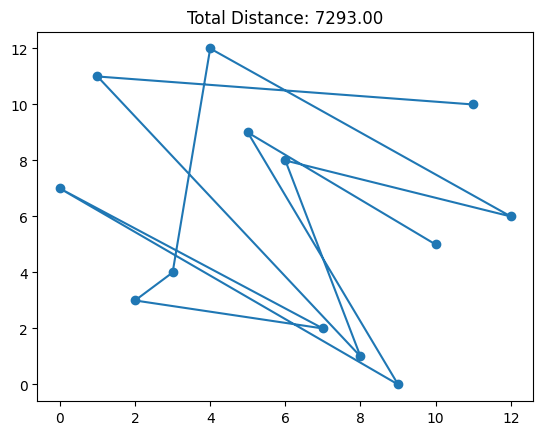

In [ ]:
# Plot the best solution
plot_solution(dist_matrix, best_solution)

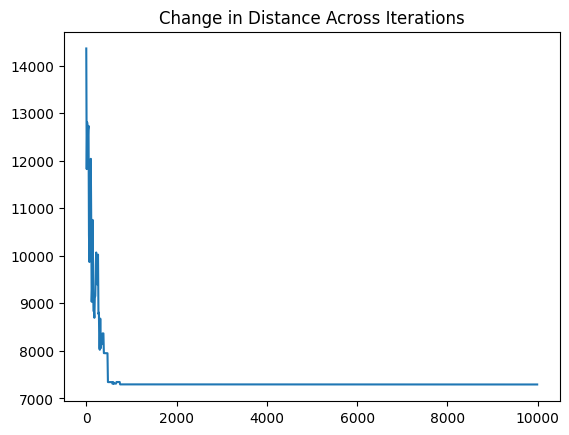

In [ ]:
# Plot progress across iterations
plot_progress(iterations, distances)
plt.title("Change in Distance Across Iterations")


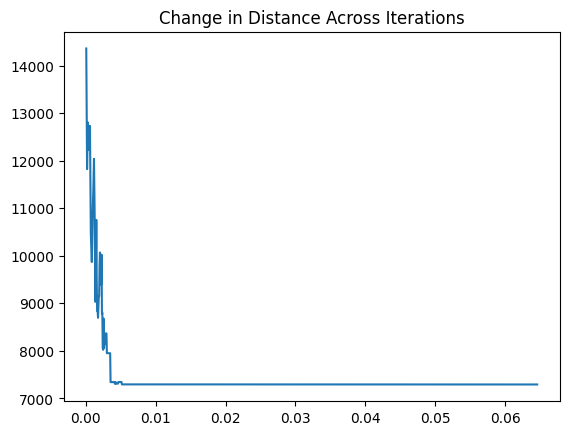

In [ ]:
plot_progress(times,distances)
plt.title("Change in Distance Over Time")

In [ ]:
distr = []
for i in range(100):
  _, best_distance, _, _, _ = simulated_annealing(dist_matrix)
  distr.append(best_distance)

In [ ]:
np.average(distr)

7489.89

(array([44.,  5., 46.,  0.,  1.,  2.,  0.,  0.,  1.,  1.]),
 array([7293. , 7418.3, 7543.6, 7668.9, 7794.2, 7919.5, 8044.8, 8170.1,
        8295.4, 8420.7, 8546. ]),
 <BarContainer object of 10 artists>)

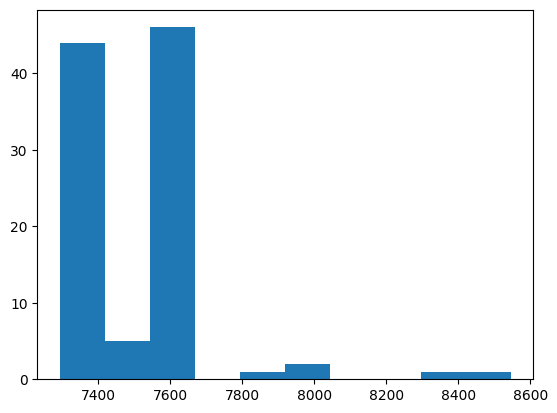

In [ ]:
plt.hist(distr)

## Genetic Algorithms


*   Step 1: Encode the Solution
*   Step 2: Initialize the Population
*   Step 3: Define the Fitness Solution
*   Step 4: Apply Genetic Operators
*   Step 5: Evaluate and Iterate
*   Step 6: Retrieve the Optimal Solution






+------------+--------------------------------------------+---------------+
| Generation |                 Best Tour                  | Best Distance |
+------------+--------------------------------------------+---------------+
|     1      | [3, 12, 6, 8, 10, 9, 2, 7, 0, 5, 1, 11, 4] |     10273     |
|     2      | [10, 8, 6, 12, 1, 11, 4, 9, 0, 7, 2, 3, 5] |      8723     |
|     3      | [8, 6, 11, 10, 5, 12, 3, 0, 7, 2, 9, 4, 1] |      9394     |
|     4      | [2, 9, 4, 10, 11, 1, 6, 12, 8, 5, 3, 0, 7] |     10280     |
|     5      | [8, 2, 3, 0, 7, 9, 10, 5, 4, 12, 6, 11, 1] |      8995     |
|     6      | [4, 5, 10, 11, 1, 6, 12, 8, 2, 7, 0, 3, 9] |      9724     |
|     7      | [9, 3, 4, 5, 10, 11, 1, 6, 12, 8, 2, 7, 0] |      9485     |
|     8      | [4, 5, 10, 11, 1, 6, 12, 8, 2, 7, 0, 3, 9] |      9724     |
|     9      | [4, 5, 10, 11, 1, 6, 12, 8, 2, 7, 0, 9, 3] |      9485     |
|     10     | [5, 10, 11, 3, 1, 6, 12, 8, 2, 7, 0, 9, 4] |     11562     |
|     11    

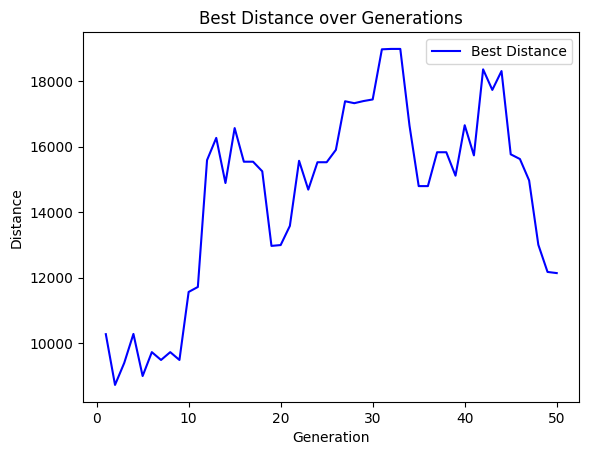

Best tour: [10, 8, 6, 12, 1, 11, 4, 9, 0, 7, 2, 3, 5]
Shortest distance: 8723


In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# The given distance matrix
dist_matrix = [
    [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
    [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
    [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
    [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
    [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
    [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
    [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
    [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
    [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
    [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
    [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
    [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
    [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0]
]

# Define the fitness function (objective is to minimize the tour distance)
def fitness_function(tour, dist_matrix):
    distance = sum(dist_matrix[tour[i]][tour[i + 1]] for i in range(len(tour) - 1))
    distance += dist_matrix[tour[-1]][tour[0]]  # Return to the starting city
    return -distance  # Negate for maximization in the genetic algorithm

# Create the initial population
def create_initial_population(size, num_cities):
    population = [random.sample(range(num_cities), num_cities) for _ in range(size)]
    return population

# Selection function with tournament selection
def selection(population, fitnesses, tournament_size=3):
    tournament_size = min(tournament_size, len(population))  # Ensure tournament_size does not exceed population size
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

# Order Crossover function for TSP
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[start:end] = parent1[start:end]

    # Fill the remaining cities in order from parent2
    pointer = end
    for city in parent2:
        if city not in child:
            if pointer >= size:
                pointer = 0
            child[pointer] = city
            pointer += 1
    return child

# Mutation function using swap mutation
def mutation(individual, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual

# Main genetic algorithm function for TSP
def genetic_algorithm_tsp(population_size, num_cities, dist_matrix, generations, mutation_rate):
    population = create_initial_population(population_size, num_cities)
    best_performer = None
    best_fitness = -float('inf')

    # Prepare for plotting
    best_fitnesses = []
    table = PrettyTable()
    table.field_names = ["Generation", "Best Tour", "Best Distance"]

    for generation in range(generations):
        fitnesses = [fitness_function(ind, dist_matrix) for ind in population]

        # Track best individual
        generation_best_individual = max(zip(population, fitnesses), key=lambda x: x[1])[0]
        generation_best_fitness = max(fitnesses)

        if generation_best_fitness > best_fitness:
            best_fitness = generation_best_fitness
            best_performer = generation_best_individual

        # Record best performer and distance for this generation
        best_distance = -generation_best_fitness
        best_fitnesses.append(best_distance)
        table.add_row([generation + 1, generation_best_individual, best_distance])

        # Selection and breeding for the next generation
        population = selection(population, fitnesses)
        next_population = []

        for i in range(0, len(population), 2):
            parent1 = population[i]
            parent2 = population[i + 1] if i + 1 < len(population) else population[0]
            child = crossover(parent1, parent2)
            next_population.append(mutation(child, mutation_rate))

        population = next_population

    # Print the table of best individuals by generation
    print(table)

    # Plot the best distance found over generations
    plt.plot(range(1, generations + 1), best_fitnesses, color='blue', label='Best Distance')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.title('Best Distance over Generations')
    plt.legend()
    plt.show()

    return best_performer, -best_fitness  # Return tour and total distance

# Parameters for the genetic algorithm
num_cities = 13  # As per the size of the provided dist_matrix
population_size = 1000  # You may want to experiment with this for larger problems
generations = 50
mutation_rate = 0.1

# Run the genetic algorithm
best_tour, best_distance = genetic_algorithm_tsp(population_size, num_cities, dist_matrix, generations, mutation_rate)
print("Best tour:", best_tour)
print("Shortest distance:", best_distance)


# Best Known Solutions of the Travelling Salesman Problem for comparison


## Brute-Force Approach (Exact)

* Step 1. calculate the total number of tours.
* Step 2. draw and list all the possible tours
* Step 3. calculate the distance of each tour.
* Step 4. choose the shortest tour, this is the optimal solution

In [ ]:
# code from from w3schools: https://www.w3schools.com/dsa/dsa_ref_traveling_salesman.php
def calculate_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    total_distance += distances[route[-1]][route[0]]
    return total_distance

def brute_force_tsp(distances):
    start = time.time()
    n = len(distances)
    cities = list(range(1, n))
    shortest_route = None
    min_distance = float('inf')

    for perm in permutations(cities):
        current_route = [0] + list(perm)
        current_distance = calculate_distance(current_route, distances)

        if current_distance < min_distance:
            min_distance = current_distance
            shortest_route = current_route

    shortest_route.append(0)

    end = time.time()
    total_time = end - start

    return shortest_route, min_distance, total_time

In [ ]:
route, total_distance, times = brute_force_tsp(dist_matrix)
print("Route:", route)
print("Total distance:", total_distance)

KeyboardInterrupt: 

In [ ]:
plot_solution(dist_matrix, route)

NameError: name 'route' is not defined

In [ ]:
plot_progress(times, distances)

Note: doesn't work well with the large example matrix (>6 min)

## Branch and Bound Method (Exact)

* Step 1: Choose a start node.
* Step 2: Set bound to a very large value, let's say infinity.
* Step 3: Choose the cheapest arc between the current and unvisited node and
add the distance to the current distance and repeat while the current
distance is less than the bound.
* Step 4: If current distance is less than bound, then we are done
* Step 5: Add up the distance and bound will be equal to the current distance.
* Step 6: Repeat step 5 until all the arcs have been covered

In [ ]:
# # Python3 program to solve
# # Traveling Salesman Problem using
# # Branch and Bound.
# maxsize = float('inf')

# # Function to copy temporary solution
# # to the final solution
# def copyToFinal(curr_path):
# 	final_path[:N + 1] = curr_path[:]
# 	final_path[N] = curr_path[0]

# # Function to find the minimum edge cost
# # having an end at the vertex i
# def firstMin(adj, i):
# 	min = maxsize
# 	for k in range(N):
# 		if adj[i][k] < min and i != k:
# 			min = adj[i][k]

# 	return min

# # function to find the second minimum edge
# # cost having an end at the vertex i
# def secondMin(adj, i):
# 	first, second = maxsize, maxsize
# 	for j in range(N):
# 		if i == j:
# 			continue
# 		if adj[i][j] <= first:
# 			second = first
# 			first = adj[i][j]

# 		elif(adj[i][j] <= second and
# 			adj[i][j] != first):
# 			second = adj[i][j]

# 	return second

# # function that takes as arguments:
# # curr_bound -> lower bound of the root node
# # curr_weight-> stores the weight of the path so far
# # level-> current level while moving
# # in the search space tree
# # curr_path[] -> where the solution is being stored
# # which would later be copied to final_path[]
# def TSPRec(adj, curr_bound, curr_weight,
# 			level, curr_path, visited):
# 	global final_res

# 	# base case is when we have reached level N
# 	# which means we have covered all the nodes once
# 	if level == N:

# 		# check if there is an edge from
# 		# last vertex in path back to the first vertex
# 		if adj[curr_path[level - 1]][curr_path[0]] != 0:

# 			# curr_res has the total weight
# 			# of the solution we got
# 			curr_res = curr_weight + adj[curr_path[level - 1]]\
# 										[curr_path[0]]
# 			if curr_res < final_res:
# 				copyToFinal(curr_path)
# 				final_res = curr_res
# 		return

# 	# for any other level iterate for all vertices
# 	# to build the search space tree recursively
# 	for i in range(N):

# 		# Consider next vertex if it is not same
# 		# (diagonal entry in adjacency matrix and
# 		# not visited already)
# 		if (adj[curr_path[level-1]][i] != 0 and
# 							visited[i] == False):
# 			temp = curr_bound
# 			curr_weight += adj[curr_path[level - 1]][i]

# 			# different computation of curr_bound
# 			# for level 2 from the other levels
# 			if level == 1:
# 				curr_bound -= ((firstMin(adj, curr_path[level - 1]) +
# 								firstMin(adj, i)) / 2)
# 			else:
# 				curr_bound -= ((secondMin(adj, curr_path[level - 1]) +
# 								firstMin(adj, i)) / 2)

# 			# curr_bound + curr_weight is the actual lower bound
# 			# for the node that we have arrived on.
# 			# If current lower bound < final_res,
# 			# we need to explore the node further
# 			if curr_bound + curr_weight < final_res:
# 				curr_path[level] = i
# 				visited[i] = True

# 				# call TSPRec for the next level
# 				TSPRec(adj, curr_bound, curr_weight,
# 					level + 1, curr_path, visited)

# 			# Else we have to prune the node by resetting
# 			# all changes to curr_weight and curr_bound
# 			curr_weight -= adj[curr_path[level - 1]][i]
# 			curr_bound = temp

# 			# Also reset the visited array
# 			visited = [False] * len(visited)
# 			for j in range(level):
# 				if curr_path[j] != -1:
# 					visited[curr_path[j]] = True

# # This function sets up final_path
# def TSP(adj):

# 	# Calculate initial lower bound for the root node
# 	# using the formula 1/2 * (sum of first min +
# 	# second min) for all edges. Also initialize the
# 	# curr_path and visited array
# 	curr_bound = 0
# 	curr_path = [-1] * (N + 1)
# 	visited = [False] * N

# 	# Compute initial bound
# 	for i in range(N):
# 		curr_bound += (firstMin(adj, i) +
# 					secondMin(adj, i))

# 	# Rounding off the lower bound to an integer
# 	curr_bound = math.ceil(curr_bound / 2)

# 	# We start at vertex 1 so the first vertex
# 	# in curr_path[] is 0
# 	visited[0] = True
# 	curr_path[0] = 0

# 	# Call to TSPRec for curr_weight
# 	# equal to 0 and level 1
# 	TSPRec(adj, curr_bound, 0, 1, curr_path, visited)

In [12]:
import math
import time

# Python3 program to solve
# Traveling Salesman Problem using Branch and Bound.

maxsize = float('inf')

# Function to copy temporary solution to the final solution
def copyToFinal(curr_path):
    final_path[:N + 1] = curr_path[:]
    final_path[N] = curr_path[0]

# Function to find the minimum edge cost having an end at the vertex i
def firstMin(adj, i):
    min_val = maxsize
    for k in range(N):
        if adj[i][k] < min_val and i != k:
            min_val = adj[i][k]
    return min_val

# Function to find the second minimum edge cost having an end at the vertex i
def secondMin(adj, i):
    first, second = maxsize, maxsize
    for j in range(N):
        if i == j:
            continue
        if adj[i][j] <= first:
            second = first
            first = adj[i][j]
        elif adj[i][j] <= second and adj[i][j] != first:
            second = adj[i][j]
    return second

# Recursive function for TSP
def TSPRec(adj, curr_bound, curr_weight, level, curr_path, visited):
    global final_res

    # Base case: All nodes are visited
    if level == N:
        if adj[curr_path[level - 1]][curr_path[0]] != 0:
            curr_res = curr_weight + adj[curr_path[level - 1]][curr_path[0]]
            if curr_res < final_res:
                copyToFinal(curr_path)
                final_res = curr_res
        return

    # Recursive exploration of next vertices
    for i in range(N):
        if adj[curr_path[level-1]][i] != 0 and not visited[i]:
            temp = curr_bound
            curr_weight += adj[curr_path[level - 1]][i]

            if level == 1:
                curr_bound -= (firstMin(adj, curr_path[level - 1]) +
                               firstMin(adj, i)) / 2
            else:
                curr_bound -= (secondMin(adj, curr_path[level - 1]) +
                               firstMin(adj, i)) / 2

            if curr_bound + curr_weight < final_res:
                curr_path[level] = i
                visited[i] = True
                TSPRec(adj, curr_bound, curr_weight, level + 1, curr_path, visited)

            # Backtrack
            curr_weight -= adj[curr_path[level - 1]][i]
            curr_bound = temp
            visited = [False] * len(visited)
            for j in range(level):
                if curr_path[j] != -1:
                    visited[curr_path[j]] = True

# Main function for TSP
def TSP(adj):
    global final_res, final_path

    curr_bound = 0
    curr_path = [-1] * (N + 1)
    visited = [False] * N

    for i in range(N):
        curr_bound += (firstMin(adj, i) + secondMin(adj, i))
    curr_bound = math.ceil(curr_bound / 2)

    visited[0] = True
    curr_path[0] = 0
    TSPRec(adj, curr_bound, 0, 1, curr_path, visited)

# Function to calculate the average runtime
def average_runtime(func, adj, runs=10):
    runtimes = []
    for _ in range(runs):
        global final_res, final_path
        final_res = maxsize
        final_path = [-1] * (N + 1)
        start_time = time.time()
        func(adj)
        end_time = time.time()
        runtimes.append(end_time - start_time)
    return sum(runtimes) / len(runtimes)

# Initialize variables
N = len(dist_matrix)
final_res = maxsize
final_path = [-1] * (N + 1)

# Calculate average runtime
runs = 1000
avg_time = average_runtime(TSP, dist_matrix, runs)

# Output the results
print("Minimum cost:", final_res)
print("Path Taken:", final_path)
print(f"Average runtime over {runs} runs: {avg_time:.6f} seconds")


Minimum cost: 7293
Path Taken: [0, 7, 2, 3, 4, 12, 6, 8, 1, 11, 10, 5, 9, 0]
Average runtime over 1000 runs: 1.306101 seconds


In [ ]:
# N = len(dist_matrix)

In [ ]:
# # final_path[] stores the final solution
# # i.e. the // path of the salesman.
# final_path = [None] * (N + 1)

# # visited[] keeps track of the already
# # visited nodes in a particular path
# visited = [False] * N

# # Stores the final minimum weight
# # of shortest tour.
# final_res = maxsize

# TSP(dist_matrix)

# print("Minimum cost :", final_res)
# print("Path Taken : ", end = ' ')
# for i in range(N + 1):
# 	print(final_path[i], end = ' ')

# # This code is contributed by ng24_7

Minimum cost : 7293
Path Taken :  0 7 2 3 4 12 6 8 1 11 10 5 9 0 

## Nearest Neighbor Method (Naive Approximation)

* Step 1. Select a random city.
* Step 2. Find the nearest unvisited city and go there.
* Step 3. Are there any unvisited cities left? If yes, repeat step 2.
* Step 4. Return to the first city.

In [ ]:
# code from w3schools: https://www.w3schools.com/dsa/dsa_ref_traveling_salesman.php
def nearest_neighbor_tsp(distances):
    n = len(distances)
    visited = [False] * n
    route = [0]
    visited[0] = True
    total_distance = 0

    for _ in range(1, n):
        last = route[-1]
        nearest = None
        min_dist = float('inf')
        for i in range(n):
            if not visited[i] and distances[last][i] < min_dist:
                min_dist = distances[last][i]
                nearest = i
        route.append(nearest)
        visited[nearest] = True
        total_distance += min_dist

    total_distance += distances[route[-1]][0]
    route.append(0)
    return route, total_distance

In [ ]:
route, total_distance = nearest_neighbor_tsp(dist_matrix)
print("Route:", route)
print("Total distance:", total_distance)

Route: [0, 7, 2, 9, 3, 4, 12, 11, 1, 8, 6, 5, 10, 0]
Total distance: 8131


# Comparison of Solutions